# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [81]:
import requests
import pandas as pd
import numpy as np
from io import StringIO

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [55]:
df = pd.read_csv("../data/am_pm.csv")

In [56]:
df.head()

,date,am,pm,target,predicted
0,2020-04-17,21.0,2.0,working_day,weekend
1,2020-04-18,1.0,68.0,weekend,working_day
2,2020-04-19,18.0,15.0,weekend,working_day
3,2020-04-20,2.0,23.0,working_day,working_day
4,2020-04-21,0.0,25.0,working_day,working_day


In [57]:
plt.style.use("dark_background")
rcParams['figure.figsize'] = 15,8

In [58]:
names = {
	"weekend" : True,
	"working_day" : False
}

col_palette = {
	"weekend" : 'green',
	"working_day" : 'blue'
}

names_list = ["weekend", "working_day"]

def get_naive_accuracy():
		return accuracy_score(
			df['target'],
			np.resize(
				np.array([df['target'].mode()]),
				df['target'].to_numpy().shape
			)
		)


def	model_boundary(
		model,
		df
	) -> None:
	X=df[['am', 'pm']].to_numpy()
	y=df['target'].to_numpy()
	model.fit(X, y)

	fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

	sns.scatterplot(
		ax=axes[0], data=df, x='am', y='pm',
		hue='target', palette=col_palette,
		s=10, legend=names_list
	)

	def get_accuracy():
		return accuracy_score(df['target'], model.predict(X))

	def plot_decision_boundary(X, pred_func):
		x_min, x_max = 	(
			X[:, 0].min() - 0.15 * np.abs(X[:, 0].min()),
			X[:, 0].max() + 0.15 * np.abs(X[:, 0].max())
		)

		y_min, y_max = 	(
			X[:, 1].min() - 0.15 * np.abs(X[:, 1].min()),
			X[:, 1].max() + 0.15 * np.abs(X[:, 1].max())
		)

		h_x = (x_max - x_min) / 300
		h_y = (y_max - x_min) / 300
		xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
		Z = pred_func((np.c_[xx.ravel(), yy.ravel()])) == "weekend"
		Z = Z.reshape(xx.shape)
		axes[1].contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)

	plot_decision_boundary(X, model.predict)

	sns.scatterplot(
		ax=axes[2], data=df, x='am', y='pm',
		hue=model.predict(X), palette=col_palette,
		s=10, legend=names_list
	)

	print("accuracy is ", get_accuracy())


accuracy is  0.6285714285714286


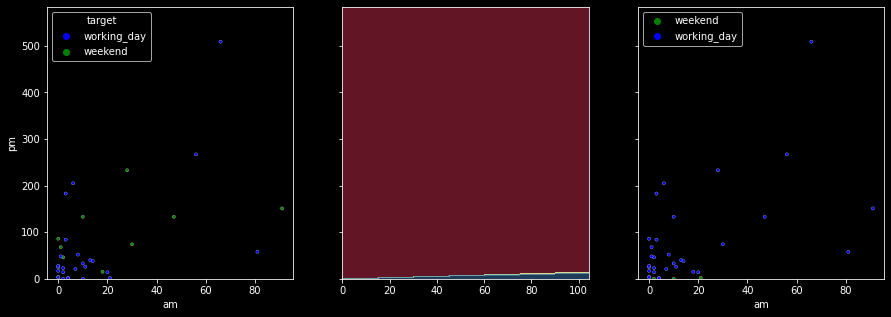

In [59]:
model_boundary(LogisticRegression(random_state=21, fit_intercept=False), df)

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

accuracy is  0.6285714285714286
naive accuracy is  0.7142857142857143


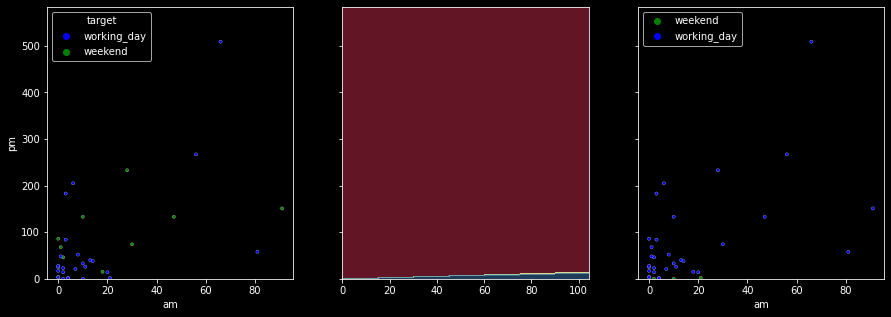

In [94]:
df2 = df.copy()
df2[['am','pm']] = StandardScaler().fit_transform(X=df2[['am','pm']])

model_boundary(LogisticRegression(random_state=21, fit_intercept=False), df)

print("naive accuracy is ", get_naive_accuracy())

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

accuracy is  0.7142857142857143


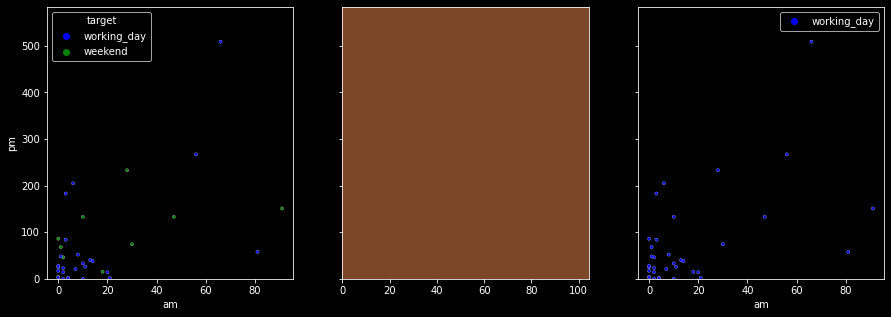

In [95]:
model_boundary(SVC(random_state=21, probability=True, kernel='linear'), df)

accuracy is  0.7428571428571429


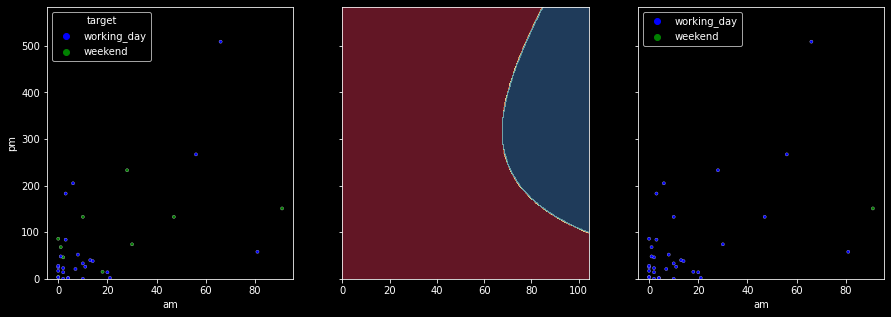

In [96]:
model_boundary(SVC(random_state=21, probability=True, kernel='poly'), df)

accuracy is  0.7142857142857143


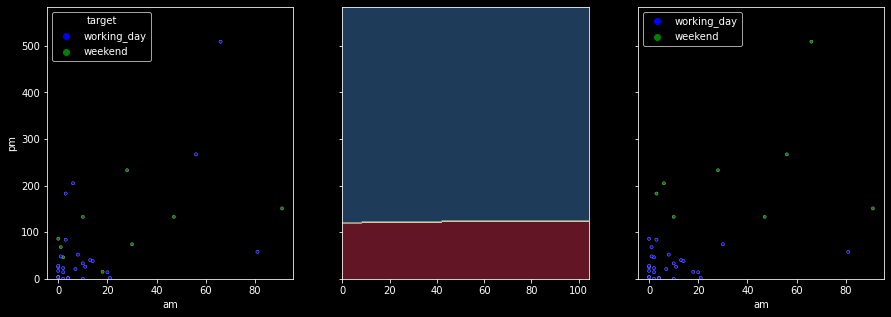

In [98]:
model_boundary(SVC(random_state=21, probability=True, kernel='sigmoid'), df)

accuracy is  0.8


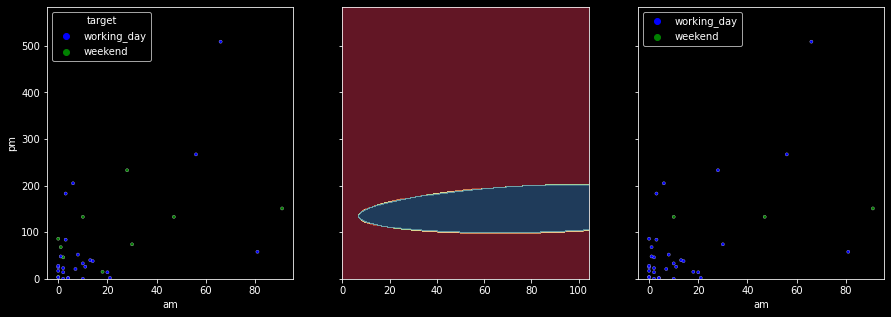

In [100]:
model_boundary(SVC(random_state=21, probability=True, kernel='rbf'), df)

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

accuracy is  0.9428571428571428


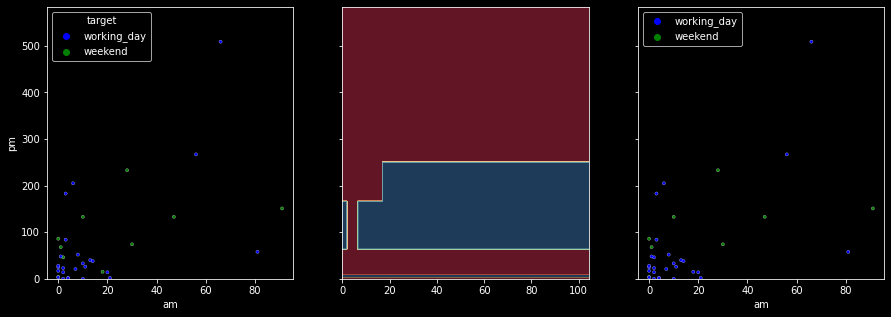

In [101]:
model_boundary(DecisionTreeClassifier(random_state=42, max_depth=4), df)

accuracy is  0.8571428571428571


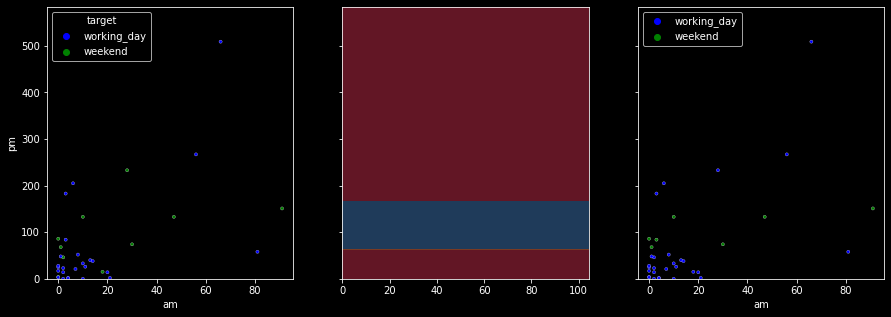

In [102]:
model_boundary(DecisionTreeClassifier(random_state=42, max_depth=2), df)

[Text(0.5, 0.8333333333333334, 'X[1] <= 63.0\ngini = 0.408\nsamples = 35\nvalue = [10, 25]\nclass = weekend'),
 Text(0.25, 0.5, 'X[1] <= 3.5\ngini = 0.227\nsamples = 23\nvalue = [3, 20]\nclass = weekend'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = weekend'),
 Text(0.375, 0.16666666666666666, 'gini = 0.291\nsamples = 17\nvalue = [3, 14]\nclass = weekend'),
 Text(0.75, 0.5, 'X[1] <= 167.0\ngini = 0.486\nsamples = 12\nvalue = [7, 5]\nclass = working_day'),
 Text(0.625, 0.16666666666666666, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = working_day'),
 Text(0.875, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = weekend')]

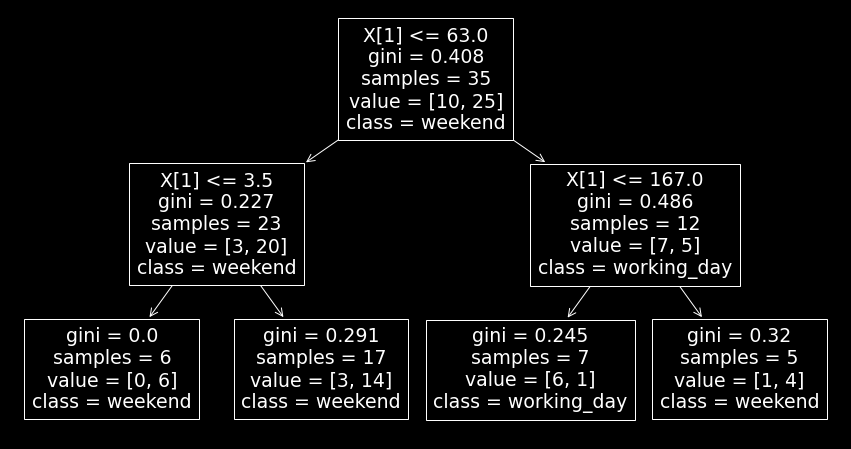

In [103]:
a = DecisionTreeClassifier(random_state=42, max_depth=2)
a.fit(df[['am', 'pm']], df['target'])
plot_tree(a, class_names=df['target'])

1